#### <font color="blue"> 2.3.4 Naive Bayes </font>

- NB모형은 훈련속도가 빠른 편이나, 일반화 성능은 낮은 편 
- 사이킷런의 NB 모형은 아래 3가지가 제공됨 

  1) Gauussian NB : 일반적인 NB모형
  
  2) Bernoulli NB : 이진 데이터에 적용
  
  3) Multinominal NB : 카운트 데이터에 적용 
  
  ###### * 2), 3)은 주로 text 분류에 사용된다. 
  ###### * 선형모델로 학습시간이 너무 오래걸리는 대량의 데이터에 대해, 나이브 베이지가 유용한 경우가 있다. 

#### <font color="blue"> 2.3.5 Decision Tree </font>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid',  palette="pastel" )

In [2]:
!pip install mglearn

In [3]:
import mglearn
import warnings
warnings.filterwarnings("ignore")

C:\Users\youngboo.choi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\youngboo.choi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
#### 유방암 데이터에대한 D.tree 모형 생성 

In [5]:
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print( tree.score(X_train, y_train) )
print( tree.score(X_test, y_test) )

1.0
0.9370629370629371


In [6]:
#### 훈련데이터에 완전 적합되었다. ==> 사전 가지치기, 즉 node의 갯수를 제한하자.  

In [7]:
tree = DecisionTreeClassifier(random_state = 0, max_depth = 4)
tree.fit(X_train, y_train)

print( tree.score(X_train, y_train) )
print( tree.score(X_test, y_test) )

0.9882629107981221
0.951048951048951


In [8]:
#### graphviz 모듈을 사용하여 tree 시각화 
#### https://thebook.io/007022/ch03/06/02-02/ 참조하여 graphviz.msi 설치 필요 

In [9]:
!pip install graphviz

In [13]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ['maligant', 'benign'], 
                feature_names = cancer.feature_names, impurity = False, filled = True)

In [14]:
with open('tree.dot') as file_reader:
    dot_graph = file_reader.read()
dot = graphviz.Source(dot_graph)    # dot_graph의 source 저장
dot.render(filename='tree.png')    # png로 저장

'tree.png.pdf'

In [ ]:
#### ram memory price trend 

In [22]:
ram_prices = pd.read_csv('data/ram_price.csv')
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


Text(0, 0.5, 'price(USD)/MB')

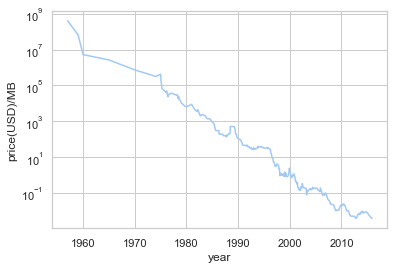

In [25]:
#### semilogy : Y값에 대해 log를 적용하여 차트를 그린다. 
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price(USD)/MB')

In [31]:
#### 1) DecisionTreeRegressor vs. LinearRegressor 

In [36]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 

## 2000을 기준으로 데이터셋을 분리 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

## date 컬럼만 추출하고, price에 로그를 씌움 
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

## 2 modles fitting 
d_tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]
pred_tree = d_tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

## 예측한 결과값에 지수(exp)를 씌워, log값을 원위치로 변환 
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

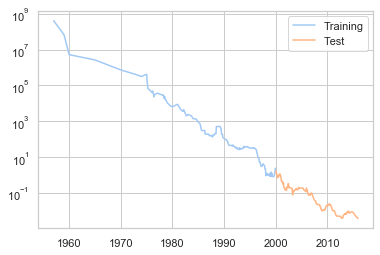

In [39]:
plt.semilogy(data_train.date, data_train.price, label = "Training")
plt.semilogy(data_test.date, data_test.price, label = "Test")
plt.legend()

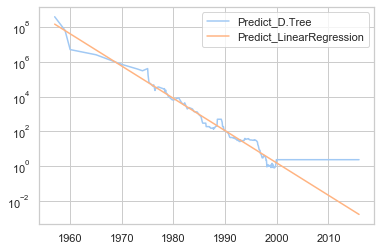

In [40]:
plt.semilogy(ram_prices.date, price_tree, label = "Predict_D.Tree")
plt.semilogy(ram_prices.date, price_lr, label = "Predict_LinearRegression")
plt.legend()

##### <font color="blue"> - tree 모델은 훈련데이터만을 예측할 수 있음, 시계열 데이터에 tree모델을 잘 쓰지 않는 이유 </font>

#### D.Tree 모형의 장/단점 
##### 1) 모형의 시각화가 쉽다 (비전문가의 이해가 용이)
##### 2) 정규화나 표준화 같은 데이터 전처리가 반드시 필요하지 않다. 
##### 3) But, 사전 가지치기를 한다고 해도 Overfitting 되는 경향이 있다 (모델 일반화 성능이 좋지 않다.)
      ----> tree model의 일반화를 위해 앙상블 모델이 대안으로 제시되었다. 